In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [40]:
df = pd.read_csv('avocado_ripeness_dataset.csv')

In [41]:
color_dummies = pd.get_dummies(df['color_category'], prefix="color_category", dtype= int)
df = df.join(color_dummies)

In [42]:
ripenessDict = {
    'hard' : 1,
    'pre-conditioned' : 2,
    'breaking' : 3,
    'firm-ripe' : 4,
    'ripe' : 5,
}

df['target'] = df['ripeness'].apply(lambda x: ripenessDict[x])

In [43]:
x_cols = ['firmness', 'hue', 'saturation', 'brightness',
       'sound_db', 'weight_g', 'size_cm3', 'color_category_black',
       'color_category_dark green', 'color_category_green',
       'color_category_purple']
y_cols = ['target']

In [44]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


df_train, df_test = shuffle_and_split_data(df, 0.2)
X_train = df_train[x_cols]
y_train = df_train[y_cols]
X_test = df_test[x_cols]
y_test = df_test[y_cols]

In [45]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

y_train_5 = y_train_5.to_numpy().ravel()

In [46]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [69]:
sgd_clf = SGDClassifier()
lgst_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(8)
svc_clf = SVC()
dtree_clf = DecisionTreeClassifier()

In [70]:
sgd_clf.fit(X_train, y_train_5)
lgst_clf.fit(X_train, y_train_5)
knn_clf.fit(X_train, y_train_5)
svc_clf.fit(X_train, y_train_5)
dtree_clf.fit(X_train, y_train_5)

DecisionTreeClassifier()

In [88]:
from sklearn.model_selection import cross_val_predict
pred_sgd_clf =  cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
pred_lgst_clf =  cross_val_predict(lgst_clf, X_train, y_train_5, cv = 3)
pred_knn_clf =  cross_val_predict(knn_clf, X_train, y_train_5, cv = 3)
pred_svc_clf =  cross_val_predict(svc_clf, X_train, y_train_5, cv = 3)
pred_dtree_clf =  cross_val_predict(dtree_clf, X_train, y_train_5, cv = 3)

In [94]:
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [90]:
print(f"sgd_clf f1 score is: {f1_score(y_train_5, pred_sgd_clf)}")
print(f"lgst_clf f1 score is: {f1_score(y_train_5, pred_lgst_clf)}")
print(f"knn_clf f1 score is: {f1_score(y_train_5, pred_knn_clf)}")
print(f"svc_clf f1 score is: {f1_score(y_train_5, pred_svc_clf)}")
print(f"dtree_clf f1 score is: {f1_score(y_train_5, pred_dtree_clf)}")

sgd_clf f1 score is: 0.9565217391304348
lgst_clf f1 score is: 1.0
knn_clf f1 score is: 0.9278350515463918
svc_clf f1 score is: 0.8256880733944955
dtree_clf f1 score is: 1.0


In [91]:
print(f"sgd_clf precision is: {precision_score(y_train_5, pred_sgd_clf)}")
print(f"lgst_clf precision is: {precision_score(y_train_5, pred_lgst_clf)}")
print(f"knn_clf precision is: {precision_score(y_train_5, pred_knn_clf)}")
print(f"svc_clf precision is: {precision_score(y_train_5, pred_svc_clf)}")
print(f"dtree_clf precision is: {precision_score(y_train_5, pred_dtree_clf)}")

sgd_clf precision is: 0.9361702127659575
lgst_clf precision is: 1.0
knn_clf precision is: 0.8653846153846154
svc_clf precision is: 0.703125
dtree_clf precision is: 1.0


In [92]:
print(f"sgd_clf recall score is: {recall_score(y_train_5, pred_sgd_clf)}")
print(f"lgst_clf recall score is: {recall_score(y_train_5, pred_lgst_clf)}")
print(f"knn_clf recall score is: {recall_score(y_train_5, pred_knn_clf)}")
print(f"svc_clf recall score is: {recall_score(y_train_5, pred_svc_clf)}")
print(f"dtree_clf recall score is: {recall_score(y_train_5, pred_dtree_clf)}")

sgd_clf recall score is: 0.9777777777777777
lgst_clf recall score is: 1.0
knn_clf recall score is: 1.0
svc_clf recall score is: 1.0
dtree_clf recall score is: 1.0


its a skewed dataset for now !

In [95]:
print(f"sgd_clf accuracy_score is: {accuracy_score(y_train_5, pred_sgd_clf)}")
print(f"lgst_clf accuracy_score is: {accuracy_score(y_train_5, pred_lgst_clf)}")
print(f"knn_clf accuracy_score is: {accuracy_score(y_train_5, pred_knn_clf)}")
print(f"svc_clf accuracy_score is: {accuracy_score(y_train_5, pred_svc_clf)}")
print(f"dtree_clf accuracy_score is: {accuracy_score(y_train_5, pred_dtree_clf)}")

sgd_clf accuracy_score is: 0.98
lgst_clf accuracy_score is: 1.0
knn_clf accuracy_score is: 0.965
svc_clf accuracy_score is: 0.905
dtree_clf accuracy_score is: 1.0


In [143]:
pred_sgd_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method='decision_function')
pred_lgst_scores = cross_val_predict(lgst_clf, X_train, y_train_5, cv = 3, method='decision_function')
pred_tree_scores = cross_val_predict(dtree_clf, X_train, y_train_5, cv = 3, method='predict_proba')


In [154]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, pred_sgd_scores)
print(len(precisions))
print(len(recalls))
print(len(thresholds))

201
201
200


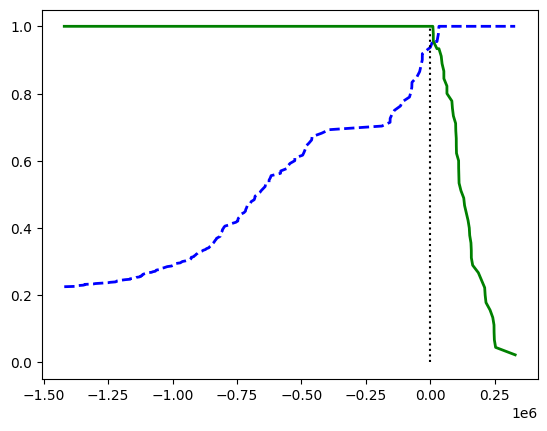

In [156]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(0, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

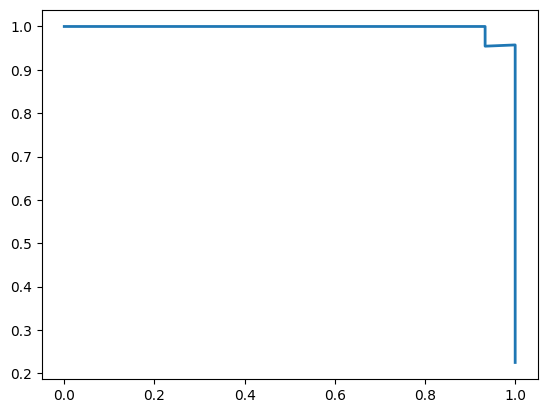

In [157]:
plt.plot(recalls, precisions, linewidth = 2)

In [158]:
from sklearn.metrics import roc_curve
fpr , tpr , thresholds = roc_curve(y_train_5,pred_sgd_scores )

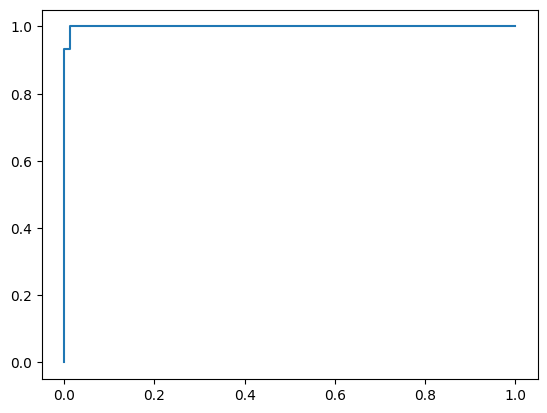

In [161]:
plt.plot(fpr, tpr)

In [163]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, pred_sgd_scores )

np.float64(0.9991397849462366)